In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
import zipfile

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Specify the correct filename within the ZIP archive
# Assuming the actual data file is 'iris.data'
with zipfile.ZipFile('/content/iris.zip') as z:
  with z.open('iris.data') as f:
    # تحميل البيانات من ملف CSV إلى DataFrame
    iris_df = pd.read_csv(f, header=None, names=columns)

In [ ]:
print(iris_df.head())


   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
print(iris_df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
print(iris_df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


In [ ]:
X = iris_df.drop('class', axis=1)  # الميزات
y = iris_df['class']  # الفئات

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

                      Status  Count
0         Actual Iris-setosa     19
1     Actual Iris-versicolor     13
2      Actual Iris-virginica     13
3      Predicted Iris-setosa     19
4  Predicted Iris-versicolor     12
5   Predicted Iris-virginica     14


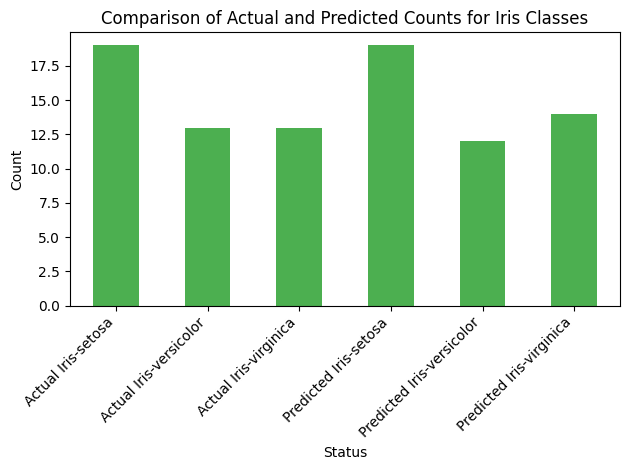

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# حساب عدد العينات الحقيقية لكل فئة
actual_counts = y_test.value_counts()  # القيم الحقيقية
predicted_counts = pd.Series(y_pred).value_counts()  # القيم المتوقعة

# إنشاء جدول ملخص البيانات
summary = pd.DataFrame({
    'Status': ['Actual Iris-setosa', 'Actual Iris-versicolor', 'Actual Iris-virginica',
               'Predicted Iris-setosa', 'Predicted Iris-versicolor', 'Predicted Iris-virginica'],
    'Count': [actual_counts.get('Iris-setosa', 0), actual_counts.get('Iris-versicolor', 0), actual_counts.get('Iris-virginica', 0),
              predicted_counts.get('Iris-setosa', 0), predicted_counts.get('Iris-versicolor', 0), predicted_counts.get('Iris-virginica', 0)]
})

# طباعة الجدول
print(summary)

# رسم البيانات
summary_plot = summary.set_index('Status')  # تحديد العمود المحوري للرسم

# تحديد اللون بناءً على الفئة (كل نوع زهرة بلون)
colors = ['#4CAF50', '#4CAF50', '#4CAF50', '#FFC107', '#FFC107', '#FFC107']

# إنشاء الرسم البياني
summary_plot.plot(kind='bar', color=colors, legend=False)
plt.title('Comparison of Actual and Predicted Counts for Iris Classes')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# عرض الرسم البياني
plt.show()


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.78%


In [ ]:
from sklearn.metrics import classification_report

classification_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

print(classification_df)

                 precision    recall  f1-score    support
Iris-setosa       1.000000  1.000000  1.000000  19.000000
Iris-versicolor   1.000000  0.923077  0.960000  13.000000
Iris-virginica    0.928571  1.000000  0.962963  13.000000
accuracy          0.977778  0.977778  0.977778   0.977778
macro avg         0.976190  0.974359  0.974321  45.000000
weighted avg      0.979365  0.977778  0.977745  45.000000
